# Athena Vortex Lattice (AVL)

## Overview

AVL is a vortex-lattice 3D aerodynamics tool developed by Mark Drela at MIT.

Following the description from the [AVL website](http://web.mit.edu/drela/Public/web/avl/):

> AVL is a program for the aerodynamic and flight-dynamic analysis of rigid aircraft of arbitrary configuration. It employs an extended vortex lattice model for the lifting surfaces, together with a slender-body model for fuselages and nacelles. General nonlinear flight states can be specified. The flight dynamic analysis combines a full linearization of the aerodynamic model about any flight state, together with specified mass properties.

## Setup

A copy of the AVL executable must be somewhere on your computer in order to use it with AeroSandbox.

Download a copy of the executable from the [AVL website](http://web.mit.edu/drela/Public/web/avl/) for your operating system. Place it anywhere on your computer, and remember the filepath to the executable.

(Optional: To make your life easier later, put the AVL executable somewhere safe and simply add it to your PATH environment variable - you can Google how to do this for your operating system.

## Running AVL from AeroSandbox

First, we'll do some imports. We'll also do some stuff that is only necessary for this tutorial to run correctly in a browser - ignore this following code block. (Basically, it's to make unit testing of tutorials happy.)

In [1]:
import aerosandbox as asb
import aerosandbox.numpy as np
from shutil import which

avl_is_present = which("avl") is not None

Next, we'll define an airplane:

In [2]:
sd7037 = asb.Airfoil("sd7037")

airplane = asb.Airplane(
    name="Vanilla",
    xyz_ref=[0.5, 0, 0],
    s_ref=9,
    c_ref=0.9,
    b_ref=10,
    wings=[
        asb.Wing(
            name="Wing",
            symmetric=True,
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=1,
                    twist=2,
                    airfoil=sd7037,
                ),
                asb.WingXSec(
                    xyz_le=[0.2, 5, 1],
                    chord=0.6,
                    twist=2,
                    airfoil=sd7037,
                ),
            ],
        ),
        asb.Wing(
            name="H-stab",
            symmetric=True,
            xyz_le=[4, 0, 0],
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.7,
                ),
                asb.WingXSec(xyz_le=[0.14, 1.25, 0], chord=0.42),
            ],
        ),
        asb.Wing(
            name="V-stab",
            xyz_le=[4, 0, 0],
            xsecs=[
                asb.WingXSec(
                    xyz_le=[0, 0, 0],
                    chord=0.7,
                ),
                asb.WingXSec(xyz_le=[0.14, 0, 1], chord=0.42),
            ],
        ),
    ],
    fuselages=[
        asb.Fuselage(
            name="Fuselage",
            xyz_le=[0, 0, 0],
            xsecs=[
                asb.FuselageXSec(
                    xyz_c=[xi * 5 - 0.5, 0, 0],
                    radius=asb.Airfoil("naca0024").local_thickness(x_over_c=xi),
                )
                for xi in np.cosspace(0, 1, 30)
            ],
        )
    ],
)

C:\Users\peter\AppData\Local\Temp/ipykernel_35048/390599860.py:28: UserWarning: The `xyz_le` input for Wing is DEPRECATED and will be removed in a future version. Use Wing().translate(xyz) instead.
  asb.Wing(
C:\Users\peter\AppData\Local\Temp/ipykernel_35048/390599860.py:43: UserWarning: The `xyz_le` input for Wing is DEPRECATED and will be removed in a future version. Use Wing().translate(xyz) instead.
  asb.Wing(
C:\Users\peter\AppData\Local\Temp/ipykernel_35048/390599860.py:59: UserWarning: The `xyz_le` input for Fuselage is DEPRECATED and will be removed in a future version. Use Fuselage().translate(xyz) instead.
  asb.Fuselage(


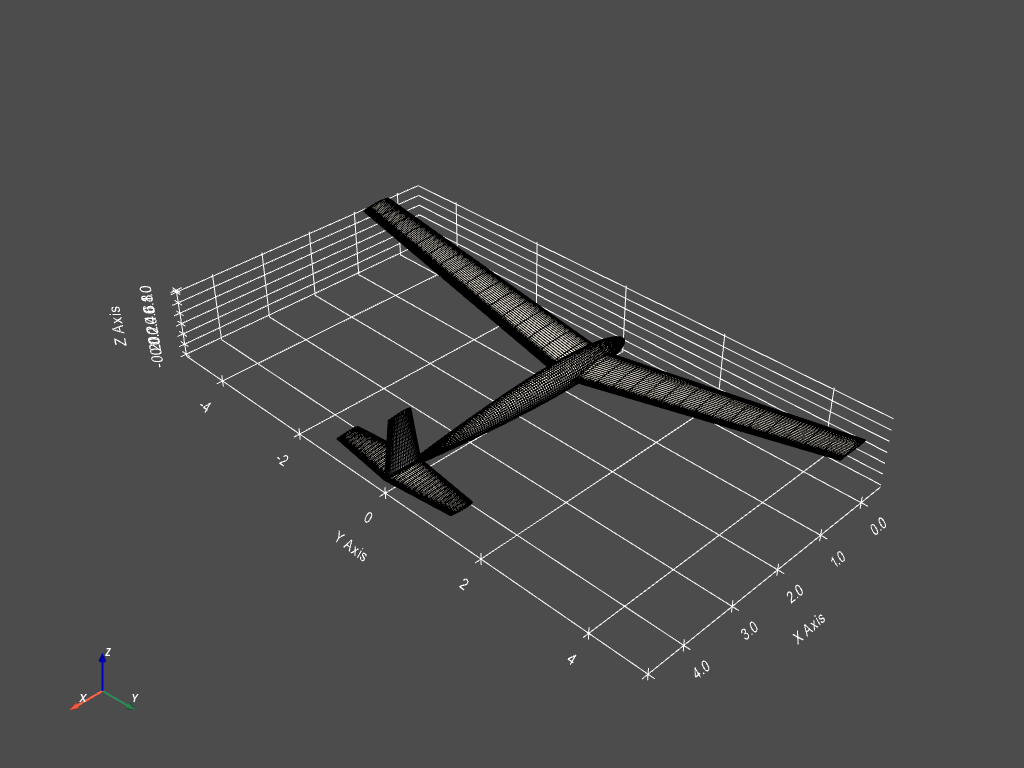

PolyData,Information
N Cells,11784
N Points,11825
X Bounds,"-5.000e-01, 4.700e+00"
Y Bounds,"-5.004e+00, 5.004e+00"
Z Bounds,"-2.399e-01, 1.038e+00"
N Arrays,0


In [3]:
# NBVAL_SKIP
airplane.draw(show_kwargs={"jupyter_backend": "static"})

Now, we can run our AVL analysis. Note the constructor input `avl_command`: if we did not add AVL to our PATH environment variable, then we need to specify the filepath to it here.

AVL uses the same "construct analysis" -> "run analysis" usage style as other aerodynamics analyses in AeroSandbox.

The output is a dictionary with all the numeric outputs from AVL for both a point analysis and a stability analysis. Stability outputs are given in stability axes.

Let's demonstrate this.

In [4]:
if avl_is_present:  # Ignore this; just for tutorial purposes.
    analysis = asb.AVL(
        airplane=airplane,
        op_point=asb.OperatingPoint(
            atmosphere=asb.Atmosphere(altitude=0),
            velocity=10,
            alpha=5,
            beta=0,
        ),
        avl_command="avl",  # If AVL is not on your PATH, then set avl_command to the filepath to your AVL executable.
    )

    output = analysis.run()

    from pprint import pprint

    pprint(output)

{'Bref': 10.0,
 'CD': 0.01885,
 'CDff': 0.0267468,
 'CDind': 0.0188524,
 'CDvis': 0.0,
 'CL': 0.95995,
 'CLa': 5.704837,
 'CLb': 0.0,
 'CLff': 0.94788,
 'CLp': 0.0,
 'CLq': 6.986008,
 'CLr': 0.0,
 'CX': 0.06488,
 'CY': 0.0,
 'CYa': 0.0,
 'CYb': -0.282304,
 'CYp': -0.252143,
 'CYq': 0.0,
 'CYr': 0.243632,
 'CZ': -0.95795,
 'Cl': 0.0,
 "Cl'": 0.0,
 'Cla': 0.0,
 'Clb': -0.232238,
 'Clb Cnr / Clr Cnb': 3.002836,
 'Clp': -0.580341,
 'Clq': -0.0,
 'Clr': 0.239867,
 'Cm': 0.12557,
 'Cma': -0.371324,
 'Cmb': 0.0,
 'Cmp': 0.0,
 'Cmq': -21.81361,
 'Cmr': -0.0,
 'Cn': -0.0,
 "Cn'": -0.0,
 'Cna': 0.0,
 'Cnb': 0.015909,
 'Cnp': -0.088925,
 'Cnq': 0.0,
 'Cnr': -0.049342,
 'Cref': 0.9,
 'Cyff': 0.0,
 'Sref': 9.0,
 'Xnp': 0.55858,
 'Xref': 0.5,
 'Yref': 0.0,
 'Zref': 0.0,
 'alpha': 5.0,
 'beta': 0.0,
 'e': 0.9623,
 'mach': 0.0,
 'p': -0.0,
 "p'b/2V": -0.0,
 'pb/2V': -0.0,
 'q': 0.0,
 'qc/2V': 0.0,
 'r': -0.0,
 "r'b/2V": -0.0,
 'rb/2V': -0.0}
